<a href="https://colab.research.google.com/github/nman7/Covid-19-India-Dashboard/blob/master/facialgender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#initialising NN
import tensorflow as tf
from tensorflow.keras.models import Sequential
#convolution layers
from tensorflow.keras.layers import Convolution2D
#pooling layers
from tensorflow.keras.layers import MaxPooling2D
#convert pool layer to vector form
from tensorflow.keras.layers import Flatten
#initialising  fully connected layer or hidden layer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.nn import local_response_normalization
from tensorflow.keras.layers import LayerNormalization,BatchNormalization

In [ ]:
#initialising cnn
classifier =  tf.keras.Sequential()
classifier.add(tf.keras.layers.Conv2D(filters=96,kernel_size=(5,5),strides=(2,2),padding='same', activation='relu', input_shape=(227,227,3)))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2))
classifier.add(tf.keras.layers.Conv2D(filters=96,kernel_size=(1,1),activation='relu'))

classifier.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding='same', activation='relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2))
classifier.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(1,1),activation='relu'))


classifier.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same', activation='relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2))
classifier.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(1,1),activation='relu'))


classifier.add(tf.keras.layers.Flatten())
classifier.add(tf.keras.layers.Dense(4019, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.Dense(2000, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.Dense(1000, activation='relu'))

#MAKING OUPUT LAYER
classifier.add(tf.keras.layers.Dense(2, activation='softmax'))

from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0001)
classifier.compile(optimizer = opt,loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
#fitting images to CNN for training
from keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '../input/genderdetectionface/dataset1/train/',
        target_size=(227,227),
        batch_size=5,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        '../input/genderdetectionface/dataset1/test/',
        target_size=(227,227),
        batch_size=5,
        class_mode='categorical')



# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=10),
             ModelCheckpoint(filepath='1.h5', monitor='val_loss', save_best_only=True)]
print(training_set.class_indices)

history = classifier.fit_generator(
        training_set,
        epochs=100,
        callbacks=callbacks,
        validation_data=test_set)

Using TensorFlow backend.


Found 1600 images belonging to 2 classes.
Found 340 images belonging to 2 classes.
{'man': 0, 'woman': 1}
Epoch 1/100
320/320 [==============================] - 46s 142ms/step - loss: 0.6995 - accuracy: 0.4906 - val_loss: 0.6923 - val_accuracy: 0.5029
Epoch 2/100
320/320 [==============================] - 46s 145ms/step - loss: 0.6900 - accuracy: 0.5825 - val_loss: 0.6162 - val_accuracy: 0.7265
Epoch 3/100
320/320 [==============================] - 54s 170ms/step - loss: 0.6183 - accuracy: 0.6675 - val_loss: 0.5347 - val_accuracy: 0.7647
Epoch 4/100
320/320 [==============================] - 55s 171ms/step - loss: 0.5525 - accuracy: 0.7350 - val_loss: 0.4646 - val_accuracy: 0.8265
Epoch 5/100
320/320 [==============================] - 53s 164ms/step - loss: 0.5018 - accuracy: 0.7588 - val_loss: 0.4173 - val_accuracy: 0.8412
Epoch 6/100
320/320 [==============================] - 53s 164ms/step - loss: 0.4841 - accuracy: 0.7781 - val_loss: 0.3250 - val_accuracy: 0.8676
Epoch 7/100
320/32

320/320 [==============================] - 31s 98ms/step - loss: 0.0877 - accuracy: 0.9694 - val_loss: 0.1688 - val_accuracy: 0.9353
Epoch 57/100
320/320 [==============================] - 33s 103ms/step - loss: 0.0861 - accuracy: 0.9675 - val_loss: 0.2705 - val_accuracy: 0.9324
Epoch 58/100
320/320 [==============================] - 32s 100ms/step - loss: 0.0977 - accuracy: 0.9694 - val_loss: 0.1489 - val_accuracy: 0.9382
Epoch 59/100
320/320 [==============================] - 32s 100ms/step - loss: 0.0725 - accuracy: 0.9725 - val_loss: 0.1756 - val_accuracy: 0.9441


<Figure size 432x288 with 0 Axes>

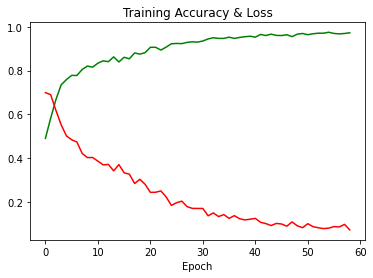

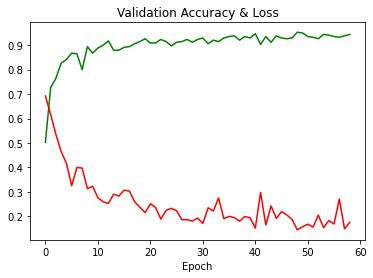

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'],'green',label='Accuracy')
plt.plot(history.history['loss'],'red',label='Loss')
plt.title('Training Accuracy & Loss')
plt.xlabel('Epoch')
plt.figure()
plt.plot(history.history['val_accuracy'],'green',label='Accuracy')
plt.plot(history.history['val_loss'],'red',label='Loss')
plt.title('Validation Accuracy & Loss')
plt.xlabel('Epoch')
plt.figure()

men


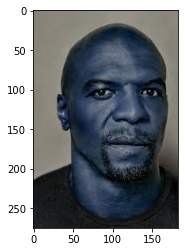

In [ ]:
from matplotlib import pyplot as plt


import cv2
imgman = cv2.imread('../input/logokephoto/person.jfif')
plt.imshow(imgman)


imgman = cv2.resize(imgman, (227,227))
imgman = imgman.reshape(1,227,227,3)

pred = classifier.predict_classes(imgman)

if pred==0:
    print("men")
else:
    print("women")




women


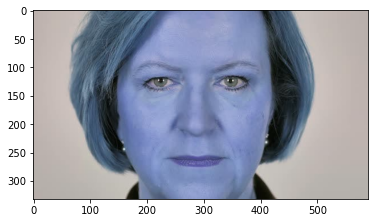

In [ ]:
imgwomen = cv2.imread('../input/logokephoto/11.jpg')
plt.imshow(imgwomen)

imgwomen= cv2.resize(imgwomen, (227,227))
imgwomen = imgwomen.reshape(1,227,227,3)

pred = classifier.predict_classes(imgwomen)
if pred==0:
  print("man")
else:
  print("women")
